In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Відобразимо датасет **banking.csv**:

In [2]:
data = pd.read_csv('C:/Users/Vitalii/Downloads/banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


Видалимо із нашого датасету непотрібні стовпці і сформуємо новий датасет, необхідний для вирішення нашого завдання:

In [3]:
X = data.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']).values
y = data['y'].values
X,y

(array([[ 4.4000e+01,  2.1000e+02,  1.0000e+00, ..., -3.6100e+01,
          4.9630e+00,  5.2281e+03],
        [ 5.3000e+01,  1.3800e+02,  1.0000e+00, ..., -4.2000e+01,
          4.0210e+00,  5.1958e+03],
        [ 2.8000e+01,  3.3900e+02,  3.0000e+00, ..., -3.9800e+01,
          7.2900e-01,  4.9916e+03],
        ...,
        [ 4.2000e+01,  6.2000e+01,  3.0000e+00, ..., -3.6400e+01,
          4.8570e+00,  5.1910e+03],
        [ 4.8000e+01,  2.0000e+02,  2.0000e+00, ..., -2.6900e+01,
          7.4200e-01,  5.0175e+03],
        [ 2.5000e+01,  1.1200e+02,  4.0000e+00, ..., -3.6400e+01,
          4.8590e+00,  5.1910e+03]]),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64))

Створимо тренувальний та тестовий датасети:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

Застосуємо логістичну регресію для прогнозування цільової метрики ймовірності того, що клієнт відкриє вклад у банку:

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\Vitalii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
y_pred = log_reg.predict(X_test)

Зробимо оцінку моделі за допомогою матриці похибок та метрик "Accuracy", "Precision", "Recall" та "F1-score":

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10649,   290],
       [  848,   570]], dtype=int64)

In [8]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9079064497855467


In [9]:
print('Precision:', metrics.precision_score(y_test, y_pred))

Precision: 0.6627906976744186


In [10]:
print('Recall:', metrics.recall_score(y_test, y_pred))

Recall: 0.4019746121297602


In [11]:
print('F1:', metrics.f1_score(y_test, y_pred, average=None))

F1: [0.94927795 0.50043898]


Побудуємо криву AUC-ROC:

In [12]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

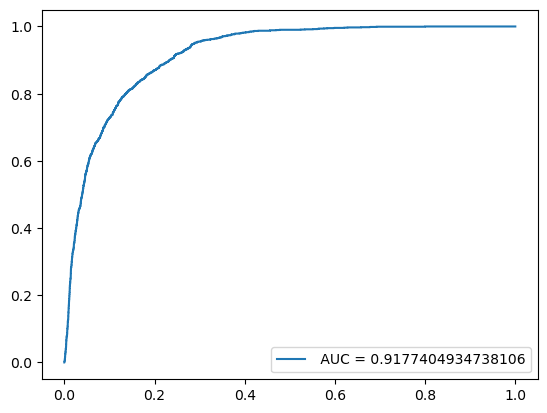

In [13]:
plt.plot(fpr, tpr, label=' AUC = '+str(auc))
plt.legend(loc=4)
plt.show()